In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pandas_gbq as pgbq

from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


import keras
import keras.utils
from keras import utils as np_utils

from tensorflow.keras import utils as np_utils
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import confusion_matrix # creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix

project_id = 'tensile-oarlock-191715'

# Load Data from Part1

In [2]:
data=pd.read_csv('referral_propensity_full_set.csv')
data

,Unnamed: 0,user_reference,age,city,province,occupation,skill_level_clean,num_viewed,num_clicked,ref_page_view_click,...,reg_lag,kyc_lag,afa_lag,if_afa,outbound_etransfer_counts,cashback_total_amt,spend,load,referred_counts,if_referred_180
0,0,_k0NAGFv,57.0,Grande Prairie,Alberta,Elementary And Secondary School Teacher Assist...,C,90.0,114.0,0.0,...,291,291,281,1,NaN,2.26,449.44,1650.00,NaN,0
1,1,BhNJhXDy,45.0,Peterview,Newfoundland and Labrador,Labourer in Manufacturing Other,D,57.0,43.0,0.0,...,278,278,260,1,NaN,1.54,309.20,350.00,NaN,0
2,2,auryKkFv,51.0,upper port la tour,Nova Scotia,Advertising Manager,O,305.0,201.0,1.0,...,289,289,269,1,3.0,5.43,248.67,682.57,NaN,0
3,3,Se.4dcyR,29.0,Barrie,Ontario,Early Childhood Educator Or Assistant,B,338.0,476.0,1.0,...,288,288,288,1,NaN,9.20,1780.10,2064.29,NaN,0
4,4,SaBVGXck,20.0,Verdun,Quebec,Student,Student,86.0,74.0,0.0,...,280,280,260,1,NaN,5.18,1046.48,1090.00,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259725,259725,qiaAiPb3,35.0,Gander,Newfoundland and Labrador,Customer Services Representative Financial Ins...,C,2.0,11.0,1.0,...,114,114,0,0,NaN,NaN,NaN,NaN,NaN,0
259726,259726,JghHCahA,36.0,point may,Newfoundland and Labrador,Customer Services Representative Financial Ins...,C,12.0,16.0,0.0,...,259,0,0,0,NaN,NaN,NaN,NaN,NaN,0
259727,259727,KtqKH7Qf,35.0,Grand Falls-Windsor,Newfoundland and Labrador,Customer Services Representative Financial Ins...,C,6.0,14.0,1.0,...,156,156,0,0,NaN,NaN,NaN,NaN,NaN,0
259728,259728,.z0rK6c6,22.0,Paradise,Newfoundland and Labrador,Fabricators Industrial Electrical Motors and T...,C,11.0,38.0,0.0,...,273,273,0,0,NaN,NaN,NaN,NaN,NaN,0


In [3]:
# query="""
# select * from analytics.referral_propensity_prediction_train_test 

# """

# data = pgbq.read_gbq(query, project_id, dialect='standard')
# data

In [4]:
len(data)

259730

# Use Feature Selected from Part 2

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259730 entries, 0 to 259729
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 259730 non-null  int64  
 1   user_reference             259730 non-null  object 
 2   age                        259730 non-null  float64
 3   city                       259729 non-null  object 
 4   province                   259730 non-null  object 
 5   occupation                 259730 non-null  object 
 6   skill_level_clean          259729 non-null  object 
 7   num_viewed                 237182 non-null  float64
 8   num_clicked                237182 non-null  float64
 9   ref_page_view_click        237182 non-null  float64
 10  referral_code_copied       24511 non-null   float64
 11  link_shared_completed      24511 non-null   float64
 12  sms_referral_shared        24511 non-null   float64
 13  total_shares               24

In [6]:
data=data.fillna(0)
data.head(10)

,Unnamed: 0,user_reference,age,city,province,occupation,skill_level_clean,num_viewed,num_clicked,ref_page_view_click,...,reg_lag,kyc_lag,afa_lag,if_afa,outbound_etransfer_counts,cashback_total_amt,spend,load,referred_counts,if_referred_180
0,0,_k0NAGFv,57.0,Grande Prairie,Alberta,Elementary And Secondary School Teacher Assist...,C,90.0,114.0,0.0,...,291,291,281,1,0.0,2.26,449.44,1650.00,0.0,0
1,1,BhNJhXDy,45.0,Peterview,Newfoundland and Labrador,Labourer in Manufacturing Other,D,57.0,43.0,0.0,...,278,278,260,1,0.0,1.54,309.20,350.00,0.0,0
2,2,auryKkFv,51.0,upper port la tour,Nova Scotia,Advertising Manager,O,305.0,201.0,1.0,...,289,289,269,1,3.0,5.43,248.67,682.57,0.0,0
3,3,Se.4dcyR,29.0,Barrie,Ontario,Early Childhood Educator Or Assistant,B,338.0,476.0,1.0,...,288,288,288,1,0.0,9.20,1780.10,2064.29,0.0,0
4,4,SaBVGXck,20.0,Verdun,Quebec,Student,Student,86.0,74.0,0.0,...,280,280,260,1,0.0,5.18,1046.48,1090.00,0.0,0
5,5,cuVnwde2,19.0,St-Zotique,Quebec,Student,Student,91.0,206.0,1.0,...,276,276,276,1,0.0,14.05,990.21,1600.00,0.0,0
6,6,0Oog6kaV,40.0,Montreal,Quebec,Mathematician,A,140.0,120.0,0.0,...,282,282,281,1,0.0,9.73,1786.54,2086.30,0.0,0
7,7,lgHrQfdf,41.0,Longueuil,Quebec,Software Engineer,A,87.0,241.0,1.0,...,286,286,286,1,0.0,57.00,10839.73,11076.25,0.0,0
8,8,tH0dsfnv,27.0,Montreal,Quebec,Executive Assistant,B,239.0,263.0,0.0,...,289,289,280,1,18.0,13.16,2633.32,3745.00,0.0,0
9,9,NqPAkZm7,36.0,Truax,Saskatchewan,Cashier,D,28.0,40.0,1.0,...,272,272,272,1,0.0,1.16,231.00,457.00,0.0,0


# Geo Data

In [7]:
data['province'].unique()

array(['Alberta', 'Newfoundland and Labrador', 'Nova Scotia', 'Ontario',
       'Quebec', 'Saskatchewan', 'Yukon', 'Nunavut', 'Manitoba',
       'New Brunswick', 'British Columbia', 'Prince Edward Island',
       'Northwest Territories'], dtype=object)

In [8]:
def Geo_Region(data):
    
    data["geo_region"]=""
    for i in range(len(data)):
        if data["province"][i] in ('Ontario','Quebec','Nova Scotia','New Brunswick','Newfoundland and Labrador','Prince Edward Island'):
            data["geo_region"][i]="Eastern Canada"
        if data["province"][i] in ('Saskatchewan','Alberta',"Manitoba",'British Columbia'):
            data["geo_region"][i]="Western Provinces"
        if data["province"][i] in ('Northwest Territories', 'Yukon','Nunavut'):
            data["geo_region"][i]="North Canada"
            
            
    return data

In [9]:
# data=Geo_Region(data)
# data

In [10]:
data.columns

Index(['Unnamed: 0', 'user_reference', 'age', 'city', 'province', 'occupation',
       'skill_level_clean', 'num_viewed', 'num_clicked', 'ref_page_view_click',
       'referral_code_copied', 'link_shared_completed', 'sms_referral_shared',
       'total_shares', 'get_20_page_view_counts', 'media_category', 'device',
       'install_lag', 'reg_lag', 'kyc_lag', 'afa_lag', 'if_afa',
       'outbound_etransfer_counts', 'cashback_total_amt', 'spend', 'load',
       'referred_counts', 'if_referred_180'],
      dtype='object')

In [11]:
data=data.drop([
    'city', 'province', 'occupation',
    'user_reference'
], axis=1)
data

,Unnamed: 0,age,skill_level_clean,num_viewed,num_clicked,ref_page_view_click,referral_code_copied,link_shared_completed,sms_referral_shared,total_shares,...,reg_lag,kyc_lag,afa_lag,if_afa,outbound_etransfer_counts,cashback_total_amt,spend,load,referred_counts,if_referred_180
0,0,57.0,C,90.0,114.0,0.0,0.0,0.0,0.0,0.0,...,291,291,281,1,0.0,2.26,449.44,1650.00,0.0,0
1,1,45.0,D,57.0,43.0,0.0,0.0,0.0,0.0,0.0,...,278,278,260,1,0.0,1.54,309.20,350.00,0.0,0
2,2,51.0,O,305.0,201.0,1.0,0.0,0.0,0.0,0.0,...,289,289,269,1,3.0,5.43,248.67,682.57,0.0,0
3,3,29.0,B,338.0,476.0,1.0,0.0,0.0,0.0,0.0,...,288,288,288,1,0.0,9.20,1780.10,2064.29,0.0,0
4,4,20.0,Student,86.0,74.0,0.0,0.0,0.0,0.0,0.0,...,280,280,260,1,0.0,5.18,1046.48,1090.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259725,259725,35.0,C,2.0,11.0,1.0,0.0,0.0,0.0,0.0,...,114,114,0,0,0.0,0.00,0.00,0.00,0.0,0
259726,259726,36.0,C,12.0,16.0,0.0,0.0,0.0,0.0,0.0,...,259,0,0,0,0.0,0.00,0.00,0.00,0.0,0
259727,259727,35.0,C,6.0,14.0,1.0,0.0,0.0,0.0,0.0,...,156,156,0,0,0.0,0.00,0.00,0.00,0.0,0
259728,259728,22.0,C,11.0,38.0,0.0,0.0,0.0,0.0,0.0,...,273,273,0,0,0.0,0.00,0.00,0.00,0.0,0


In [12]:
data.columns

Index(['Unnamed: 0', 'age', 'skill_level_clean', 'num_viewed', 'num_clicked',
       'ref_page_view_click', 'referral_code_copied', 'link_shared_completed',
       'sms_referral_shared', 'total_shares', 'get_20_page_view_counts',
       'media_category', 'device', 'install_lag', 'reg_lag', 'kyc_lag',
       'afa_lag', 'if_afa', 'outbound_etransfer_counts', 'cashback_total_amt',
       'spend', 'load', 'referred_counts', 'if_referred_180'],
      dtype='object')

# One Hot Encoding

In [13]:
def One_Hot_Encoding(df, col):
    
    label_encoder=LabelEncoder()
    var_array=df[col].to_numpy()
    vector=label_encoder.fit_transform(var_array)
    
    return vector

In [14]:
def Encoded_Name_Match(vector,df,col):
    
    vec_lst=vector.tolist()
    cate_lst=df[col].to_list()
    
    list_of_tuples = list(zip(vec_lst, cate_lst))
    
    df_cate = pd.DataFrame(list_of_tuples, columns = ['vec_lst', 'cate_lst']).drop_duplicates(keep='first')
    df_cate=df_cate.sort_values(['vec_lst'], ascending=[True]).reset_index(drop=True)
    
    return df_cate

In [15]:
def To_Categoty_Mapping_Back(vector,df):
    
    encoded_array=keras.utils.np_utils.to_categorical(vector)
    
    col_name_lst=df["cate_lst"].to_list()

    encoded_result = pd.DataFrame(encoded_array, columns = col_name_lst)
    
    return encoded_result

In [16]:
def One_Hot_Encoding_Output(data,col):
    vector=One_Hot_Encoding(data, col)
    df_cate=Encoded_Name_Match(vector,data,col)
    one_hot_encoded_sys=To_Categoty_Mapping_Back(vector,df_cate)
    # one_hot_encoded_sys.head()
    return one_hot_encoded_sys

In [17]:
data['device']=data['device'].replace(0,'unknown')

In [18]:
data['skill_level_clean']=data['skill_level_clean'].replace(0,'unknown')

In [19]:
data['device'].unique()

array(['ios', 'android', 'web', 'undefined', 'unknown'], dtype=object)

In [20]:
skill=One_Hot_Encoding_Output(data,'skill_level_clean')
skill.head(10)

,A,B,C,D,Disabled,O,Retired,Student,Unemployed,unknown
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
# geo=One_Hot_Encoding_Output(data,'geo_region')
# geo.head(10)

In [22]:
media_category=One_Hot_Encoding_Output(data,'media_category')
media_category.head(10)

,Missing,Organic,Paid,Partner,Referral
0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,1.0,0.0
6,0.0,1.0,0.0,0.0,0.0
7,0.0,0.0,1.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0


In [23]:
device=One_Hot_Encoding_Output(data,'device')
device.head(10)

,android,ios,undefined,unknown,web
0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0
5,0.0,0.0,0.0,0.0,1.0
6,1.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0
8,0.0,1.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,0.0


In [24]:
data=data.merge(skill,left_index=True, right_index=True).merge(media_category,left_index=True, right_index=True).merge(device,left_index=True, right_index=True)


In [25]:
data.columns

Index(['Unnamed: 0', 'age', 'skill_level_clean', 'num_viewed', 'num_clicked',
       'ref_page_view_click', 'referral_code_copied', 'link_shared_completed',
       'sms_referral_shared', 'total_shares', 'get_20_page_view_counts',
       'media_category', 'device', 'install_lag', 'reg_lag', 'kyc_lag',
       'afa_lag', 'if_afa', 'outbound_etransfer_counts', 'cashback_total_amt',
       'spend', 'load', 'referred_counts', 'if_referred_180', 'A', 'B', 'C',
       'D', 'Disabled', 'O', 'Retired', 'Student', 'Unemployed', 'unknown_x',
       'Missing', 'Organic', 'Paid', 'Partner', 'Referral', 'android', 'ios',
       'undefined', 'unknown_y', 'web'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 259730 entries, 0 to 259729
Data columns (total 44 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Unnamed: 0                 259730 non-null  int64  
 1   age                        259730 non-null  float64
 2   skill_level_clean          259730 non-null  object 
 3   num_viewed                 259730 non-null  float64
 4   num_clicked                259730 non-null  float64
 5   ref_page_view_click        259730 non-null  float64
 6   referral_code_copied       259730 non-null  float64
 7   link_shared_completed      259730 non-null  float64
 8   sms_referral_shared        259730 non-null  float64
 9   total_shares               259730 non-null  float64
 10  get_20_page_view_counts    259730 non-null  float64
 11  media_category             259730 non-null  object 
 12  device                     259730 non-null  object 
 13  install_lag                25

In [58]:
X=data[[

                 
     'age', 

    'afa_lag', 


    'num_viewed', 'num_clicked',  

    'get_20_page_view_counts',
     
    
    'spend',
    
    
    'load',
    
    'cashback_total_amt'


                ]]

X.head(10)

,age,afa_lag,num_viewed,num_clicked,get_20_page_view_counts,spend,load,cashback_total_amt
0,57.0,281,90.0,114.0,0.0,449.44,1650.00,2.26
1,45.0,260,57.0,43.0,0.0,309.20,350.00,1.54
2,51.0,269,305.0,201.0,1.0,248.67,682.57,5.43
3,29.0,288,338.0,476.0,1.0,1780.10,2064.29,9.20
4,20.0,260,86.0,74.0,0.0,1046.48,1090.00,5.18
5,19.0,276,91.0,206.0,1.0,990.21,1600.00,14.05
6,40.0,281,140.0,120.0,0.0,1786.54,2086.30,9.73
7,41.0,286,87.0,241.0,1.0,10839.73,11076.25,57.00
8,27.0,280,239.0,263.0,0.0,2633.32,3745.00,13.16
9,36.0,272,28.0,40.0,1.0,231.00,457.00,1.16


In [59]:
y=data['if_referred_180']
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: if_referred_180, dtype: int64

In [60]:
data.columns

Index(['Unnamed: 0', 'age', 'skill_level_clean', 'num_viewed', 'num_clicked',
       'ref_page_view_click', 'referral_code_copied', 'link_shared_completed',
       'sms_referral_shared', 'total_shares', 'get_20_page_view_counts',
       'media_category', 'device', 'install_lag', 'reg_lag', 'kyc_lag',
       'afa_lag', 'if_afa', 'outbound_etransfer_counts', 'cashback_total_amt',
       'spend', 'load', 'referred_counts', 'if_referred_180', 'A', 'B', 'C',
       'D', 'Disabled', 'O', 'Retired', 'Student', 'Unemployed', 'unknown_x',
       'Missing', 'Organic', 'Paid', 'Partner', 'Referral', 'android', 'ios',
       'undefined', 'unknown_y', 'web'],
      dtype='object')

# Dataset Balance Check/ Stratification

In [61]:
sum(y)/len(y)

0.05603126323489778

In [62]:
X=X.to_numpy()
X

array([[5.7000e+01, 2.8100e+02, 9.0000e+01, ..., 4.4944e+02, 1.6500e+03,
        2.2600e+00],
       [4.5000e+01, 2.6000e+02, 5.7000e+01, ..., 3.0920e+02, 3.5000e+02,
        1.5400e+00],
       [5.1000e+01, 2.6900e+02, 3.0500e+02, ..., 2.4867e+02, 6.8257e+02,
        5.4300e+00],
       ...,
       [3.5000e+01, 0.0000e+00, 6.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.2000e+01, 0.0000e+00, 1.1000e+01, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [2.6000e+01, 0.0000e+00, 3.0000e+00, ..., 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [63]:
y=y.to_numpy()
y

array([0, 0, 0, ..., 0, 0, 0])

In [64]:
# from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, stratify=y)

In [65]:
sum(Y_train)/len(Y_train)

0.056032690441844585

In [66]:
sum(Y_test)/len(Y_test)

0.05602698165801673

# XGBoost Model

In [67]:
import xgboost as xgb

In [68]:
clf_xgb = xgb.XGBClassifier(objective='binary:logistic', 
                            eval_metric="logloss",
                            
                              gamma= 0, 
                              learning_rate= 0.2, 
                              max_depth= 3, 
                              reg_lambda= 5,
                              scale_pos_weight= 8,
                            
#                             gamma=20,
#                             learning_rate=0.2,
#                             max_depth=4,
#                             reg_lambda=20,
#                             scale_pos_weight=8,
                            
                            

                            
                            use_label_encoder=False
                           )

clf_xgb.fit(X_train, 
            Y_train,
            verbose=True,
            ## the next three arguments set up early stopping.
            early_stopping_rounds=10,
            eval_metric='aucpr',

            eval_set=[(X_test, Y_test)])

[12:15:08] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1593723618214/work/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[0]	validation_0-aucpr:0.35744
Will train until validation_0-aucpr hasn't improved in 10 rounds.
[1]	validation_0-aucpr:0.36641
[2]	validation_0-aucpr:0.43060
[3]	validation_0-aucpr:0.43402
[4]	validation_0-aucpr:0.43560
[5]	validation_0-aucpr:0.43620
[6]	validation_0-aucpr:0.43690
[7]	validation_0-aucpr:0.43690
[8]	validation_0-aucpr:0.43739
[9]	validation_0-aucpr:0.44225
[10]	validation_0-aucpr:0.44713
[11]	validation_0-aucpr:0.44711
[12]	validation_0-aucpr:0.44725
[13]	validation_0-aucpr:0.44764
[14]	validation_0-aucpr:0.44850
[15]	validation_0-aucpr:0.44934
[16]	validation_0-aucpr:0.44893
[17]

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=5,
              scale_pos_weight=8, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

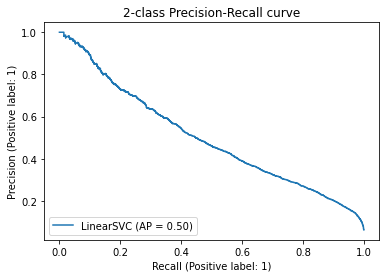

In [69]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf_xgb, X_test, Y_test, name="LinearSVC"
)
_ = display.ax_.set_title("2-class Precision-Recall curve")

In [70]:
# baseline 
baseline=sum(Y_train)/len(Y_train)
baseline

0.056032690441844585

In [71]:
sum(Y_train)

10915

In [72]:
len(Y_train)

194797

In [73]:
neg_class=len(Y_train)-sum(Y_train)
neg_class

183882

In [74]:
positive_class=sum(Y_train)
positive_class

10915

In [75]:
# sum(negative instances) / sum(positive instances)
neg_class/positive_class

16.846724690792488

# Logistic Regression Test (Why should we Not use it) [Not Balanced Data]

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
logisticRegr = LogisticRegression()

In [78]:
logisticRegr.fit(X_train, Y_train)

/Users/lilian/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

/Users/lilian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


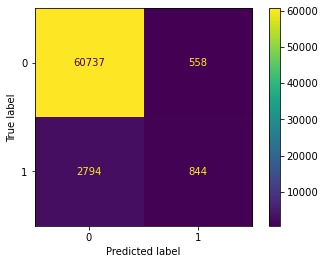

In [79]:
# logistic regression 
plot_confusion_matrix(logisticRegr, 
                      X_test, 
                      Y_test,
                      values_format='d',
                    

                     )

# Confusion Matrix XGboost

/Users/lilian/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


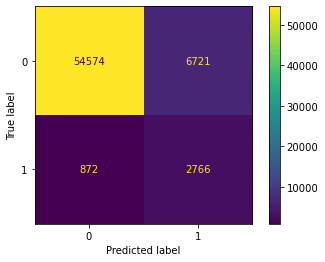

In [80]:
plot_confusion_matrix(clf_xgb, 
                      X_test, 
                      Y_test,
                      values_format='d',
                    

                     )

In [87]:
# 0 class
54574/(54574+6721)

0.8903499469777306

In [88]:
# 1 class
2766/(2766+872)

0.760307861462342

In [90]:
#  could reduce 85% lifecycle messaing to get 76% referrals

(6721+2766)/len(Y_test)

0.14610444612138665

In [85]:
from sklearn.metrics import classification_report
predictions = clf_xgb.predict(X_test)
print(classification_report(Y_test, predictions))


              precision    recall  f1-score   support

           0       0.98      0.89      0.93     61295
           1       0.29      0.76      0.42      3638

    accuracy                           0.88     64933
   macro avg       0.64      0.83      0.68     64933
weighted avg       0.95      0.88      0.91     64933



<!-- #### w optimize recall -->

In [86]:
# from sklearn.metrics import classification_report
# predictions = clf_xgb.predict(X_test)
# print(classification_report(Y_test, predictions))

# Code ENDs Here  [Below is Testing]

In [56]:
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, make_scorer 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import plot_confusion_matrix 


In [ ]:

# ROUND 1
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.05],
    'gamma': [0, 0.25, 1.0],
    'reg_lambda': [0, 1.0, 10.0],
    'scale_pos_weight': [10, 20, 30] # NOTE: XGBoost recommends sum(negative instances) / sum(positive instances)
}


optimal_params = GridSearchCV(
    estimator=xgb.XGBClassifier(objective='binary:logistic', 
                                eval_metric="logloss", ## this avoids a warning...
                                seed=42,
                                subsample=0.9,
                                colsample_bytree=0.5,
                                use_label_encoder=False),
    param_grid=param_grid,
    scoring='roc_auc', 
    verbose=0, 
    n_jobs = 10,
    cv = 3
)

optimal_params.fit(X_train, 
                   Y_train, 
                   early_stopping_rounds=10,                
                   eval_metric='auc',
                   eval_set=[(X_test, Y_test)],
                   verbose=False)
print(optimal_params.best_params_)

In [196]:
# ## ROUND 2
# param_grid = {
#     'max_depth': [5,6,7],
#     'learning_rate': [0.1,0.20,0.3],
#     'gamma': [0],
#     'reg_lambda': [10,20,30],
#      'scale_pos_weight': [8,9,10]
# }

# optimal_params = GridSearchCV(
#     estimator=xgb.XGBClassifier(objective='binary:logistic', 
#                                 eval_metric="logloss", ## this avoids a warning...
#                                 seed=42,
#                                 subsample=0.9,
#                                 colsample_bytree=0.5,
#                                 use_label_encoder=False),
#     param_grid=param_grid,
#     scoring='roc_auc', 
#     verbose=0, 
#     n_jobs = 10,
#     cv = 3
# )

# optimal_params.fit(X_train, 
#                    Y_train, 
#                    early_stopping_rounds=10,                
#                    eval_metric='auprc',
#                    eval_set=[(X_test, Y_test)],
#                    verbose=False)
# print(optimal_params.best_params_)